<a href="https://colab.research.google.com/github/RafsanJany-44/ACM/blob/master/SHAP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Powered By](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

#What is SHAP? 
[Get](https://www.youtube.com/watch?v=NBg7YirBTN8)


In [26]:
!pip install shap
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
import shap
import sklearn
from sklearn.preprocessing import LabelEncoder
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv'
dataset = pd.read_csv(data)
encoder=LabelEncoder()
dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])
shap.initjs()
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

dataset.head()

,Sleep Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,4,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,0.00724,0.74927,3.87122,1.99805,0.87415,0.000210,35.21561,42.20878,49.95122,49.95122
1,4,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,0.00723,0.49951,3.74634,1.24878,0.49951,0.000095,34.34146,43.33268,49.95122,49.95122
2,4,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,0.00230,0.62439,5.24488,2.12293,0.62439,0.000074,34.59122,45.95512,49.95122,49.95122
3,4,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,0.00091,0.87415,6.61854,3.12195,0.62439,0.000082,32.46829,43.95707,49.95122,49.95122
4,4,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,0.00175,0.49951,5.74439,2.24780,0.49951,0.000077,33.59220,44.83122,49.95122,49.95122


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [29]:
X100 = shap.utils.sample(X_train, 100)

In [30]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#FInding the co efficients

In [31]:
print("Model coefficients:\n")
talika_cof=[]
talika_col=[]
dic={}
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=", model.coef_[i].round(5))
    talika_col.append(X_train.columns[i])
    talika_cof.append(model.coef_[i].round(5))
    dic[X_train.columns[i]]=model.coef_[i].round(5)


Model coefficients:

MeanP_Alpha_F4 = -174.25301
MedianF_Alpha_F4 = 0.01353
MeanF_Alpha_F4 = 0.05006
Spectral Edge_Alpha_F4 = 9e-05
PeakF_Alpha_F4 = -0.01997
MeanP_Beta_F4 = 172.35823
MedianF_Beta_F4 = 0.01271
MeanF_Beta_F4 = -0.00914
Spectral Edge_Beta_F4 = 0.0127
PeakF_Beta_F4 = -0.00528
MeanP_Theta_F4 = 17.83983
MedianF_Theta_F4 = -0.03529
MeanF_Theta_F4 = -0.02026
Spectral Edge_Theta_F4 = -0.09603
PeakF_Theta_F4 = 0.01519
MeanP_Delta_F4 = -0.62696
MedianF_Delta_F4 = -0.43091
MeanF_Delta_F4 = -0.16171
Spectral Edge_Delta_F4 = 0.20705
PeakF_Delta_F4 = -0.10636
MeanP_Gamma_F4 = -42.65511
MedianF_Gamma_F4 = 0.00467
MeanF_Gamma_F4 = -0.00894
Spectral Edge_Gamma_F4 = 0.01967
PeakF_Gamma_F4 = -0.00388
MeanP_Alpha_C4 = -13.02379
MedianF_Alpha_C4 = 0.00077
MeanF_Alpha_C4 = -0.02282
Spectral Edge_Alpha_C4 = 0.02076
PeakF_Alpha_C4 = -0.00351
MeanP_Beta_C4 = -17.1461
MedianF_Beta_C4 = 0.00688
MeanF_Beta_C4 = -0.00674
Spectral Edge_Beta_C4 = 0.01363
PeakF_Beta_C4 = -0.00658
MeanP_Theta_C4 = 22.

**Features for Max Co efficients**




In [32]:
MxCof = max(dic, key=dic.get)
print("Maximum value:",MxCof)

Maximum value: MeanP_Beta_F4


#Partial dependence plots

The <b>gray</b> horizontal line in the plot above represents the expected value of the model. The vertical <b>gray</b> line represents the average value of the <b>MeanP_Beta_F4</b> feature. The <b>blue</b> partial dependence plot line (which the is average value of the model output when the <b>MeanP_Beta_F4</b> is fixed feature to a given value) always passes through the interesection of the two gray expected value lines. This <b>intersection</b> point can be considered as the “center” of the partial dependence plot with respect to the data distribution. 

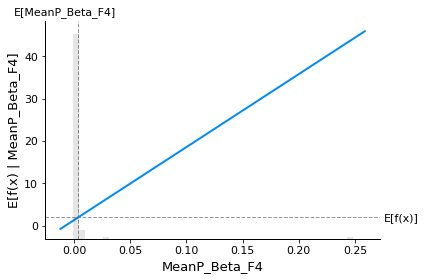

In [33]:
shap.partial_dependence_plot(
    MxCof, model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

Permutation explainer: 32537it [25:21, 21.24it/s]                           


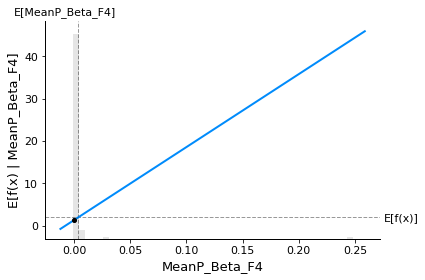

In [34]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X_test)

sample_ind = 20               
shap.partial_dependence_plot(
    MxCof, model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

**Summary plot - most important features:**

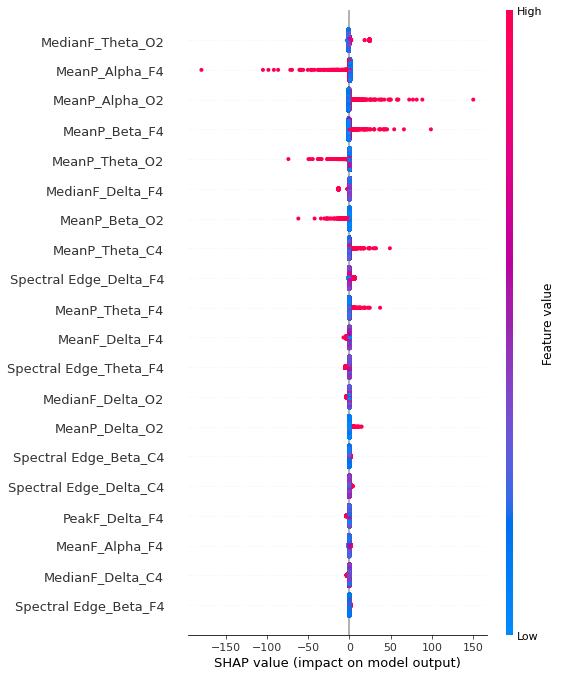

In [38]:
shap.summary_plot(shap_values, X_test)

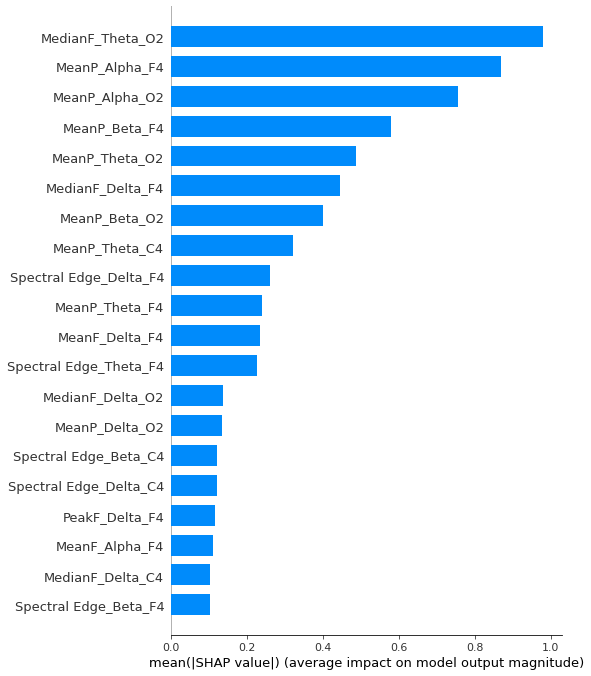

In [37]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

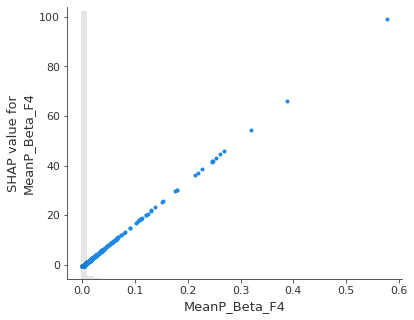

In [35]:
shap.plots.scatter(shap_values[:,MxCof])

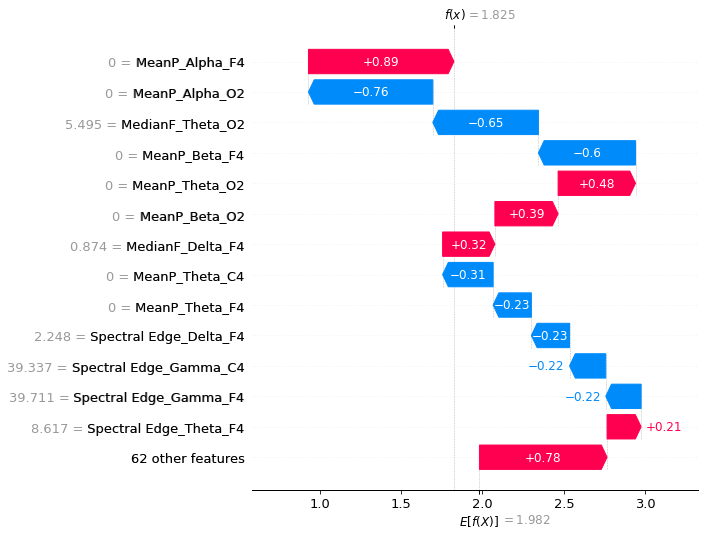

In [11]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)



---



---



In [ ]:
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X_train, y_train)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X_test)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    MxCof, model_ebm.predict, X100, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)

Permutation explainer: 100%|█████████▉| 32493/32536 [1:58:30<00:08,  5.31it/s]

In [ ]:
#the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm)

In [ ]:
#train XGBoost model
import xgboost
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

#explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X_test)

#make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot( 
    MxCof, model_xgb.predict, X100, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_xgb[sample_ind:sample_ind+1,:]
)

In [ ]:
shap.plots.scatter(shap_values_xgb[:,MxCof])

In [ ]:
shap.plots.scatter(shap_values_xgb[:,MxCof], color=shap_values)

In [ ]:


# a simple linear logistic model
model_a = sklearn.linear_model.LogisticRegression(max_iter=1000)
model_a.fit(X_train, y_train)

def model_a_proba(x):
    return model_a.predict_proba(x)[:,1]
def model_a_log_odds(x):
    p = model_a.predict_log_proba(x)
    return p[:,1] - p[:,0]

In [ ]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    MxCof, model_a_proba, X_test, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)


In [19]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X_test, max_samples=100)
explainer = shap.Explainer(model_a_proba, background_adult)
shap_values_a = explainer(X_test[:1000])

Permutation explainer: 1001it [01:31,  9.95it/s]


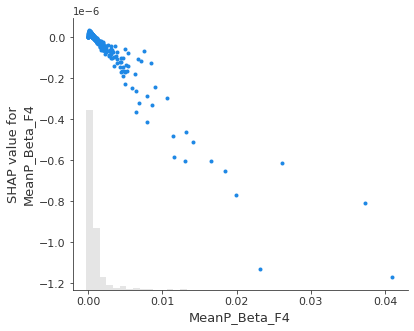

In [20]:
shap.plots.scatter(shap_values_a[:,MxCof])

In [ ]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(model_a_log_odds, background_adult)
shap_values_a_log_odds = explainer_log_odds(X_test[:1000])

Permutation explainer:  30%|██▉       | 298/1000 [00:27<01:03, 11.06it/s]

In [ ]:
shap.plots.scatter(shap_values_a_log_odds[:,MxCof])

In [ ]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    MxCof, model_a_log_odds, X_test, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [24]:
# train XGBoost model
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X_train, y_train*1, eval_metric="logloss")

# compute SHAP values
explainer = shap.Explainer(model, background_adult)
shap_values = explainer(X_test)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)[0].values

100%|===================| 162607/162680 [10:49<00:00]       

In [25]:
shap.plots.bar(shap_values)

IndexError: ignored

In [ ]:
shap.plots.bar(shap_values.abs.max(0))

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

In [ ]:
shap.plots.heatmap(shap_values[:1000])

In [ ]:
shap.plots.scatter(shap_values[:,"Age"])

In [ ]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values)

In [ ]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values[:,"Capital Gain"])

In [ ]:
shap.plots.scatter(shap_values[:,"Relationship"], color=shap_values)

In [ ]:
clustering = shap.utils.hclust(X_adult, y_adult)

In [ ]:
shap.plots.bar(shap_values, clustering=clustering)

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)